# Catmull Rom 1D

### Livro Kim - pag 65

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# import splines
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from scipy.interpolate import interp1d
import scipy as sp
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime

In [2]:
def get_neighbors(l, p):
    '''pegando os vizinhos'''
    if np.floor(p) == 0:
        f0 = 0
        f1 = 0
        f2 = 1
        f3 = 2
    elif np.floor(p) == 1:
        f0 = 0
        f1 = 1
        f2 = 1
        f3 = 2
    elif np.floor(p) == len(l) - 2:  #np.floor(p) == 1 ---- mesmo caso
        f0 = len(l) - 3
        f1 = len(l) - 2
        f2 = len(l) - 2
        f3 = len(l) - 1
    elif np.floor(p) >= len(l) - 1: #np.floor(p) == 0 ---- mesmo caso 
        f0 = len(l) - 1
        f1 = len(l) - 1
        f2 = len(l) - 2
        f3 = len(l) - 3
    else:  
        f1 = int(np.floor(p)) 
        f0 = f1 - 1
        f2 = f1 + 1
        f3 = f1 + 2
        
    return l[f0], l[f1], l[f2], l[f3]

## Catmull-Rom 2D

In [3]:
def normalizeCR(p):
    '''normalizando o ponto'''
    return p - np.floor(p) #onde está o ponto em relação ao intervalo considerado

def catmullRomDef(f,f0, f1, f2, f3):
    
    d1 = (f2 - f0) / 2 
    d2 = (f3 - f1) / 2 

    D = f2 - f1 

    a3 = d1 + d2 - 2 * D
    a2 = 3 * D - 2 * d1 - d2
    a1 = d1
    a0 = f1

    return a3*f**3 + a2*f**2 + a1*f + a0
    

def callCatmullRom(g, p):
    '''interpolação em 1D'''
    f0, f1, f2, f3 = get_neighbors(g, p) #p é posição

    f = normalizeCR(p)
    
    return catmullRomDef(f, f0, f1, f2, f3) 

## Catmull-Rom 1D Monotonico

### Livro Kim - pag 215

Na interpolação linear consideramos que a função é monotônica, ou seja, é crescente ou decrescente, e com isso sabemos que o resultado da interpolação estará sempre entre o mínimo e o máximo da função, no entanto, a interpolação de Catmull-Rom encontra um spline cúbico, que não é necessáriamente monotonico, logo faz-se necessário encontrar uma solução para este problema para que a interpolação de Catmull-Rom não extrapole com funções não monótonas.

A solução é: Forçar um máximo e um mínimo nos pontos de borda do intervalo caso a função não seja monotona, isto é, impor que as derivadas devem ser 0 caso tenham sinais diferentes. 

In [4]:
def normalize(x1, x2, p):
    return (p-x1)/(x2-x1)

def sign(a):
    if (a != abs(a)):
        return -1
    return 1

def monotonicCR(p, f0, f1, f2, f3):
    
    d1 = (f2 - f0) / 2 
    d2 = (f3 - f1) / 2 
    D = f2 - f1 
    
    k = 0.00001
    if (D < k): 
        d1 = d2 = 0
    if (sign(D) != sign(d1)):
        d1 = 0
    if(sign(D) != sign(d2)):
        d2 = 0
        
    a3 = d1 + d2 - 2 * D
    a2 = 3 * D - 2 * d1 - d2
    a1 = d1
    a0 = f1

    return (a3*p**3 + a2*p**2 + a1*p + a0)

In [5]:
def callCRMonotonic(g, p):
    '''interpolação em 1D'''
    f0, f1, f2, f3 = get_neighbors(g, p) #p é posição

    f = normalizeCR(p)
    
    return monotonicCR(f, f0, f1, f2, f3) 

## Catmull-Rom 2D

In [6]:
def callCatmullRom2D(grid, px, py):  #pegando os vizinhos em 2D
    
    ####### CATmull rom COMUMMM#############
    
    f0, f1, f2, f3 = get_neighbors(grid[int(np.floor(py))], py)
    #callCatmullRom
    
    if((py >= len(grid[0])-1) and (py <= len(grid[0]))):#maior q 9 e menor q 10
        f0 = callCatmullRom(grid[int(np.floor(py)), :], px)
        f1 = callCatmullRom(grid[int(np.floor(py)), :], px)
        f2 = callCatmullRom(grid[int(np.floor(py))-1, :], px)
        f3 = callCatmullRom(grid[int(np.floor(py))-2, :], px)
    elif((py >= len(grid[0])-2) and (py < len(grid[0] -1))): #menor que 9 e maior que 8
        f0 = callCatmullRom(grid[int(np.floor(py))+1, :], px)
        f1 = callCatmullRom(grid[int(np.floor(py)), :], px)
        f2 = callCatmullRom(grid[int(np.floor(py)), :], px)
        f3 = callCatmullRom(grid[int(np.floor(py))-2, :], px)
    else:
        f0 = callCatmullRom(grid[int(np.floor(py))-1, :], px)
        f1 = callCatmullRom(grid[int(np.floor(py)), :], px)
        f2 = callCatmullRom(grid[int(np.floor(py))+1, :], px)
        f3 = callCatmullRom(grid[int(np.floor(py))+2, :], px)
        
    f = normalizeCR(py) 
    
    return  catmullRomDef(f,f0, f1, f2, f3)

## Catmull-Rom 2D monotonico

In [7]:
def callCRMonotonic(g, p):
    '''interpolação em 1D'''
    f0, f1, f2, f3 = get_neighbors(g, p) #p é posição

    f = normalizeCR(p)
    
    return monotonicCR(f, f0, f1, f2, f3) 

In [8]:
def callCRMonotonic2D(grid, px, py):  #pegando os vizinhos em 2D
    
    f0, f1, f2, f3 = get_neighbors(grid[int(np.floor(py))], py)
    #callCatmullRom
    
    if((py >= len(grid[0])-1) and (py <= len(grid[0]))):#maior q 9 e menor q 10
        f0 = callCRMonotonic(grid[int(np.floor(py)), :], px)
        f1 = callCRMonotonic(grid[int(np.floor(py)), :], px)
        f2 = callCRMonotonic(grid[int(np.floor(py))-1, :], px)
        f3 = callCRMonotonic(grid[int(np.floor(py))-2, :], px)
    elif((py >= len(grid[0])-2) and (py < len(grid[0] -1))): #menor que 9 e maior que 8
        f0 = callCRMonotonic(grid[int(np.floor(py))+1, :], px)
        f1 = callCRMonotonic(grid[int(np.floor(py)), :], px)
        f2 = callCRMonotonic(grid[int(np.floor(py)), :], px)
        f3 = callCRMonotonic(grid[int(np.floor(py))-2, :], px)
#     elif((py >= 0) and (py < 1)): #menor que 1 e maior que 0
#         f0 = callCRMonotonic(grid[int(np.floor(py)), :], px)
#         f1 = callCRMonotonic(grid[int(np.floor(py)), :], px)
#         f2 = callCRMonotonic(grid[int(np.floor(py))+1, :], px)
#         f3 = callCRMonotonic(grid[int(np.floor(py))+2, :], px)
    else:
        f0 = callCRMonotonic(grid[int(np.floor(py))-1, :], px)
        f1 = callCRMonotonic(grid[int(np.floor(py)), :], px)
        f2 = callCRMonotonic(grid[int(np.floor(py))+1, :], px)
        f3 = callCRMonotonic(grid[int(np.floor(py))+2, :], px)
        
    f = normalizeCR(py) 
    
    return  monotonicCR(f,f0, f1, f2, f3)
 

# TESTE

### Catmull-Rom 1D 

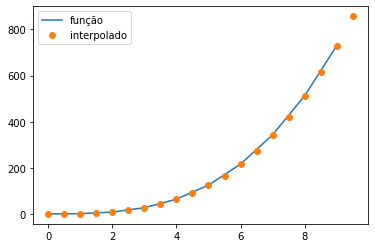

In [9]:
xc = np.arange(0, 10, 1) #funcionou perfeito
yc = xc**3 # grid básico

xi = np.arange(0, 10, 0.5)
yi = xi**3

zr = [callCatmullRom(yc, i) for i in range (0,len(yc))]
zi  =  [callCatmullRom(yi, i) for i in range (0,len(yi))]

plt.plot(xc, zr, label="função")
plt.plot(xi, zi, "o", label="interpolado")
plt.legend()

### Catmull-Rom monotonico - 1D

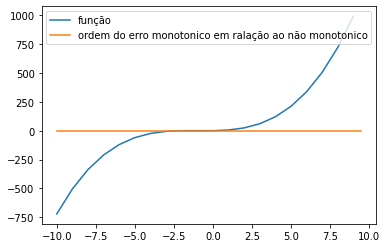

In [10]:
xc = np.arange(-10, 10, 1) #funcionou perfeito
yc = (xc+1)*(xc+2)*xc

xi = np.arange(-10, 10, 0.5)
yi = (xi+1)*(xi+2)*xi
px = np.arange(-10, 10, 0.2)

zr = [callCatmullRom(yc, i) for i in range (0,len(yc))]
zi  = [callCatmullRom(yc, px[i]) for i in range (0,len(yi))]
zm = [callCRMonotonic(yc, px[i]) for i in range (0,len(yi))]

zi = np.array(zi)
zm = np.array(zm)
diff = abs(zm-zi)

plt.plot(xc, yc, label="função")
plt.plot(xi, diff, label="ordem do erro monotonico em ralação ao não monotonico")
plt.legend()

### Funções para criação de grids

In [11]:
def CR2D(Zcr, px, py, m):
    zi = []
    if (m == 1):
        iniEXE = datetime.now()
        for i in range(0, len(px)):
            for j in range(0,len(py)):
                zi.append(callCRMonotonic2D(Zcr , px[i], py[j]))
        fimEXE = datetime.now()
        print('Tempo de execução Monotonico: {}'.format(fimEXE - iniEXE))
    else:
        iniEXE = datetime.now()
        for i in range(0, len(px)):
            for j in range(0,len(py)):
                zi.append(callCatmullRom2D(Zcr, px[i], py[j]))
        fimEXE = datetime.now()
        print('Tempo de execução 2D: {}'.format(fimEXE - iniEXE))
    zi = np.reshape(zi,(len(px), len(py)))
    return zi

In [12]:
def createGrid(ini, final, t):
    xi = np.arange(ini, final, t)
    yi = np.arange(ini, final, t)
    gridTeste = np.meshgrid(xi, yi)
    X = gridTeste[0]
    Y = gridTeste[1]
    Z = X**2 + Y**2 # passar a função na mão, não sei um jeito de aumatizar
    return Z

def createGridM(ini, final, t):
    xi = np.arange(ini, final, t)
    yi = np.arange(ini, final, t)
    gridTeste = np.meshgrid(xi, yi)
    X = gridTeste[0]
    Y = gridTeste[1]
    Z = (X+0.1)*(X+0.5)*(Y+0.5)*(Y+0.1) # passar a função na mão, não sei um jeito de aumatizar
    return Z

def createGridSin(ini, final, t):
    xi = np.arange(ini, final, t)
    yi = np.arange(ini, final, t)
    gridTeste = np.meshgrid(xi, yi)
    X = gridTeste[0]
    Y = gridTeste[1]
    Z = np.sin(X)*np.sin(Y) # passar a função na mão, não sei um jeito de aumatizar
    return Z

### Catmull-Rom 2D 

In [13]:
Zcr = createGrid(-10, 10, 1)
px = np.arange(0, Zcr.shape[0], 0.25) #x é indiceeeeee
py = np.arange(0, Zcr.shape[1], 0.25) # sempre passar o índice

Zi = CR2D(Zcr, px, py, 0)
print(Zi.shape)

Tempo de execução 2D: 0:00:00.778588
(80, 80)


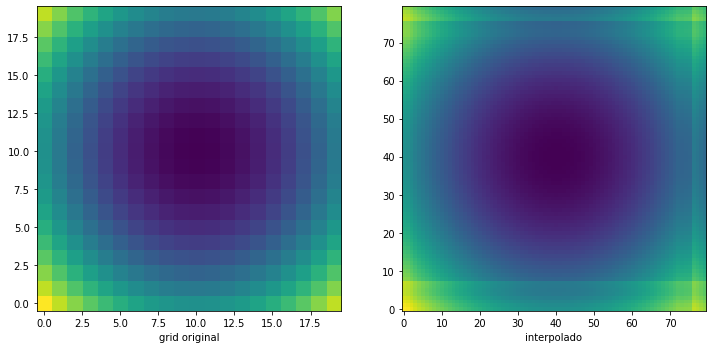

In [14]:
fig, ax = plt.subplots(figsize = (12, 6), nrows = 1, ncols = 2)
ax[0].imshow(Zcr, origin = "lower")
ax[0].set_xlabel("grid original")
ax[1].imshow(Zi, origin = "lower")
ax[1].set_xlabel("interpolado") 
# fig.colorbar(ax = ax)
plt.show()

### Catmull-Rom 2D monotonico

In [15]:
ZbaseM = createGridM(-10, 10, 1)
px = np.arange(0, ZbaseM.shape[0], 0.25) #x é indiceeeeee
py = np.arange(0, ZbaseM.shape[1], 0.25) # sempre passar o índice

ZMi = CR2D(ZbaseM, px, py, 1)
print(ZMi.shape)

Tempo de execução Monotonico: 0:00:00.612400
(80, 80)


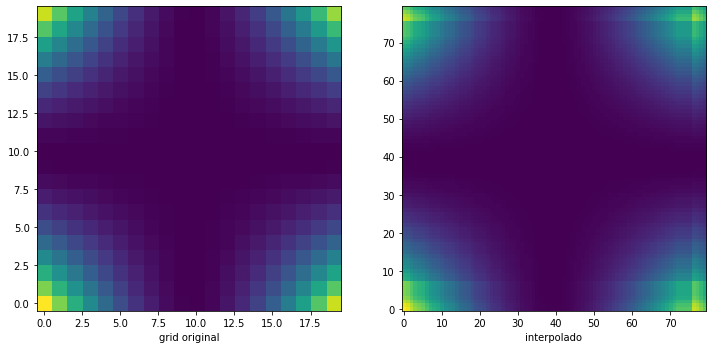

In [16]:
fig, ax = plt.subplots(figsize = (12, 6), nrows = 1, ncols = 2)
ax[0].imshow(ZbaseM, origin = "lower")
ax[0].set_xlabel("grid original")
ax[1].imshow(ZMi, origin = "lower")
ax[1].set_xlabel("interpolado") 
plt.show()

### Comparação monotônico vs não monotônico

In [17]:
ZiNM = CR2D(ZbaseM, px, py, 0)

Tempo de execução 2D: 0:00:00.585973


In [18]:
Zerr = abs(ZMi - ZiNM)

# plt.imshow(Zerr, origin="lower")
# plt.title("Comparação")
# plt.colorbar()
# plt.show()

In [19]:
ZbaseMs = createGridSin(-10, 10, 1)
px = np.arange(0, ZbaseMs.shape[0], 0.25) #x é indiceeeeee
py = np.arange(0, ZbaseMs.shape[1], 0.25) # sempre passar o índice

ZNs = CR2D(ZbaseMs, px, py, 1) 
Znm = CR2D(ZbaseMs, px, py, 0) #não monotonico
print(ZNs.shape)

Tempo de execução Monotonico: 0:00:00.571013
Tempo de execução 2D: 0:00:00.523475
(80, 80)


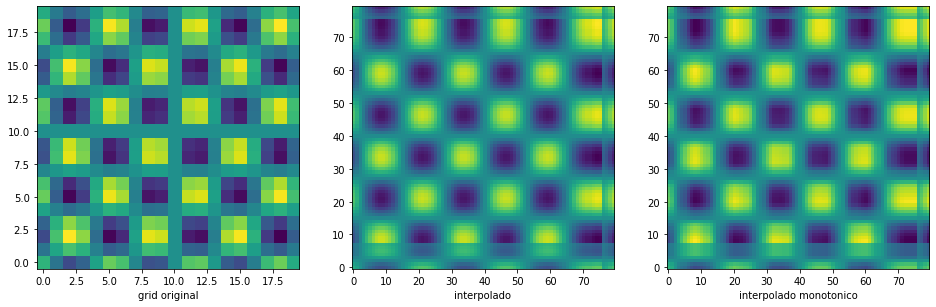

In [20]:
fig, ax = plt.subplots(figsize = (16, 8), nrows = 1, ncols = 3)
ax[0].imshow(ZbaseMs, origin = "lower")
ax[0].set_xlabel("grid original")
ax[1].imshow(Znm, origin = "lower")
ax[1].set_xlabel("interpolado") 
ax[2].imshow(ZNs, origin = "lower")
ax[2].set_xlabel("interpolado monotonico") 
plt.show() ### monotonico

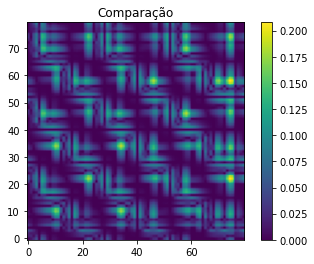

In [21]:
Zerrs = abs(Znm - ZNs)

plt.imshow(Zerrs, origin="lower")
plt.title("Comparação")
plt.colorbar()
plt.show()

In [22]:
def duration(ini, fim):
    time = fim - ini
    return time

### Erro entre grid analitico e interpolado

In [23]:
# erro analítico e interpolado
Zanalitico = createGridSin(-10, 10, 0.25)

Tempo de execução 2D: 0:00:01.288594
Tempo de execução Monotonico: 0:00:01.351158


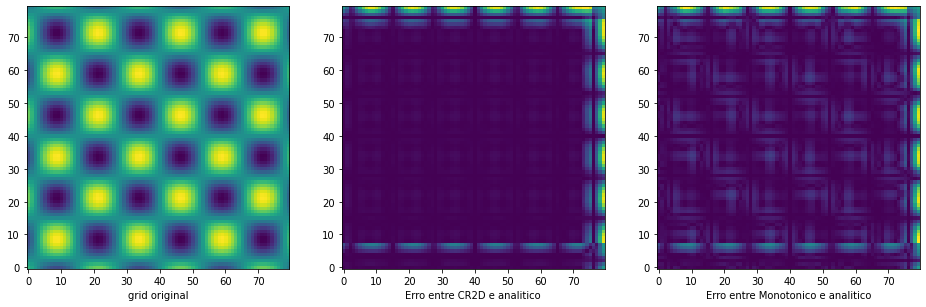

In [24]:
Znm = CR2D(ZbaseMs, px, py, 0) 
ZM = CR2D(ZbaseMs, px, py, 1) #MONOTONICO
Zerr1 = abs(Zanalitico - Znm)
Zerr2 = abs(Zanalitico - ZM)

fig, ax = plt.subplots(figsize = (16, 8), nrows = 1, ncols = 3)
ax[0].imshow(Zanalitico, origin = "lower")
ax[0].set_xlabel("grid original")
ax[1].imshow(Zerr1, origin = "lower")
ax[1].set_xlabel("Erro entre CR2D e analitico") 
ax[2].imshow(Zerr2, origin = "lower")
ax[2].set_xlabel("Erro entre Monotonico e analitico") 
plt.show() ### monotonico

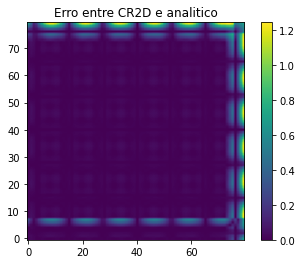

In [25]:
plt.imshow(Zerr1, origin="lower")
plt.title("Erro entre CR2D e analitico")
plt.colorbar()
plt.show()

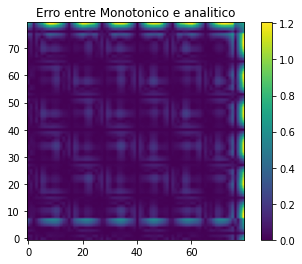

In [26]:
plt.imshow(Zerr2, origin="lower")
plt.title("Erro entre Monotonico e analitico")
plt.colorbar()
plt.show()

# CR2D MONOTONICO TEM QUE SER MAIS ACURADO QUE CR2D

In [27]:
e1 = np.max(Zerr1)
e1

1.2443951561740163

In [28]:
e2 = np.max(Zerr2)
print(e1>e2)
#ERRO CR2D maior que Monotonico

True


In [29]:
e1-e2

0.038680360316709406

# erro médio - MSE

### diferença da ordem de 0.01 

- achei uma diferença muito pequena entre os dois, esperava maior 